In [1]:
# Capture

import numpy as np
import cv2

cap =cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('capture',gray)
    if cv2.waitKey(10) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()

In [3]:
# Filter the image

import imutils
import easyocr
bfilter = cv2.cv2.bilateralFilter(gray, 11, 17, 17)
edge = cv2.Canny(bfilter, 30, 200)
keytake = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keytake)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
loc = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        loc = approx
        break
mask = np.zeros(gray.shape, np.uint8)
nimg = cv2.drawContours(mask , [loc], 0,255,-1)
nimg = cv2.bitwise_and(frame, frame, mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop = gray[x1:x2+1, y1:y2+1]
reader = easyocr.Reader(['en'])
result = reader.readtext(crop)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


c:\users\rutuja sadaphule\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


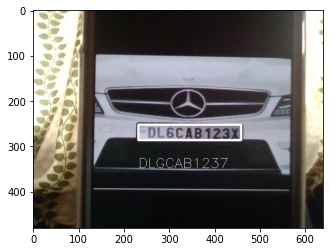

In [5]:
from matplotlib import pyplot as plt

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
result = cv2.putText(frame, text=text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,255,255), thickness=1)
result = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (255,255,255), 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [6]:
# Print Number
print(text)

DLGCAB1237
